# How many normal summons (starters) are optimal for a deck 🃏
### Constraints:
- We can only normal summon once
- We want to open one normal summon
- The normal summon monsters have no value after the initial normal summon. Others remain in hand as bricks 
- Deck has 40-60 cards
### Optimization parameters: 
- Maximize the probability of opening a starter
- Minimize the probability of opening more than one starter

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
# Probability of pulling a normal monster from a deck of 40 cards
def binom_coeff(n, k):
    return m.factorial(n) // (m.factorial(k) * m.factorial(n - k))

### PMF for Hypergeometric distribution
$P(X = i) = \frac{{\binom{{s}}{{i}} \cdot \binom{{n - s}}{{k - i}}}}{{\binom{{n}}{{k}}}}$

In [3]:
def hypergeometric_distribution(n, k, s, i):
    """
    n: number of cards in the deck
    k: number of cards you want to draw
    s: number of cards that are successes
    i: number of successes! you want to draw
    """
    return (binom_coeff(s, i) * binom_coeff(n-s, k-i))/binom_coeff(n, k)

### PMF for Multivariate Hypergeometric distribution 
$P(X_1 = i_1, X_2 = i_2, ..., X_K = i_K) = 
    \frac{{\binom{{s_1}}{{i_1}} \cdot \binom{{s_2}}{{i_2}} \cdot ... \cdot \binom{{s_C}}{{i_C}}}}{{\binom{{n}}{{k}}}}$
where:
- $n$ is the population size
- $C$ is the number of types of objects (classes) in the population
- $k$ is the number of objects sampled
- $s_1, s_2, ..., s_C$ are the number of objects of each type in the population
- $i_1, i_2, ..., i_C$ are the number of objects of each type in the sample


In [4]:
def multivariate_hypergeometric_distribution(n, k, S, I):
    numerator = 1

    # Compute the numerator
    for i in range(len(S)):
        numerator *= binom_coeff(S[i], I[i])
    numerator *= binom_coeff(n - sum(S), k - sum(I))

    return numerator / binom_coeff(n, k)

### Example 1:
Suppose we have a deck of 40 cards, and we want to know the probability of drawing a single Armageddon knight, that we play 3 of, in our first 5 draws.

### Solution:

In [5]:
p = hypergeometric_distribution(40, 5, 3, 1)
print("The probability is {:.2%}".format(p))

The probability is 30.11%


### Example 2:
Suppose we have a deck of 40 cards, and we want to know the probability of drawing a single Armageddon Knight, that we play 3 of, or a single Dark Grepher, that we play 3 of, in our first 5 draws.

### Solution:

In [6]:
p = multivariate_hypergeometric_distribution(40, 5, [3, 3], [1, 0]) + multivariate_hypergeometric_distribution(40, 5, [3, 3], [0, 1])
print("The probability is {:.2%}".format(p))

The probability is 42.29%


# Graphing the distribution based on several parameters

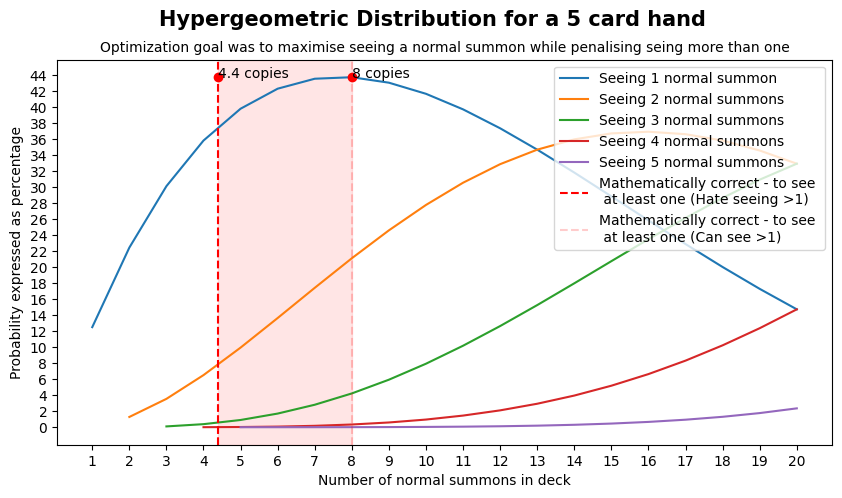

In [99]:
seeing_1 = []
for i in range(1, 21):
    seeing_1.append(hypergeometric_distribution(40, 5, i, 1)*100)

seeing_2 = []
for i in range(2, 21):
    seeing_2.append(hypergeometric_distribution(40, 5, i, 2)*100)

seeing_3 = []
for i in range(3, 21):
    seeing_3.append(hypergeometric_distribution(40, 5, i, 3)*100)

seeing_4 = []
for i in range(4, 21):
    seeing_4.append(hypergeometric_distribution(40, 5, i, 4)*100)

seeing_5 = []
for i in range(5, 21):
    seeing_5.append(hypergeometric_distribution(40, 5, i, 5)*100)

mathematically_correct = (range(1, 21)[seeing_1.index(max(seeing_1))] +
                          range(2, 21)[seeing_2.index(min(seeing_2))] +
                          range(3, 21)[seeing_3.index(min(seeing_3))] +
                          range(4, 21)[seeing_4.index(min(seeing_4))] +
                          range(5, 21)[seeing_5.index(min(seeing_5))])/5

no_optimization = range(1, 21)[seeing_1.index(max(seeing_1))]

# y-axis to be in percentage
plt.plot(range(1, 21), seeing_1)
plt.plot(range(2, 21), seeing_2)
plt.plot(range(3, 21), seeing_3)
plt.plot(range(4, 21), seeing_4)
plt.plot(range(5, 21), seeing_5)
plt.axvline(x=mathematically_correct, color='r', linestyle='--')
plt.axvline(x=no_optimization, color='r', linestyle='--', alpha=0.2)
plt.plot(mathematically_correct, max(seeing_1), 'ro')
plt.text(mathematically_correct, max(seeing_1), '{} copies'.format(mathematically_correct))
plt.plot(no_optimization, max(seeing_1), 'ro')
plt.text(no_optimization, max(seeing_1), '{} copies'.format(no_optimization))
plt.axvspan(mathematically_correct, no_optimization, alpha=0.1, color='red')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(range(1, 21))
plt.yticks(range(0, 45, 2))
plt.xlabel('Number of normal summons in deck')
plt.ylabel('Probability expressed as percentage')
plt.suptitle('Hypergeometric Distribution for a 5 card hand', fontsize=15, fontweight='bold')
plt.title('Optimization goal was to maximise seeing a normal summon while penalising seing more than one', fontsize=10)
plt.legend(['Seeing 1 normal summon', 'Seeing 2 normal summons', 'Seeing 3 normal summons', 'Seeing 4 normal summons', 'Seeing 5 normal summons', 'Mathematically correct - to see \n at least one (Hate seeing >1)', 'Mathematically correct - to see \n at least one (Can see >1)'], loc='upper right')
plt.show()


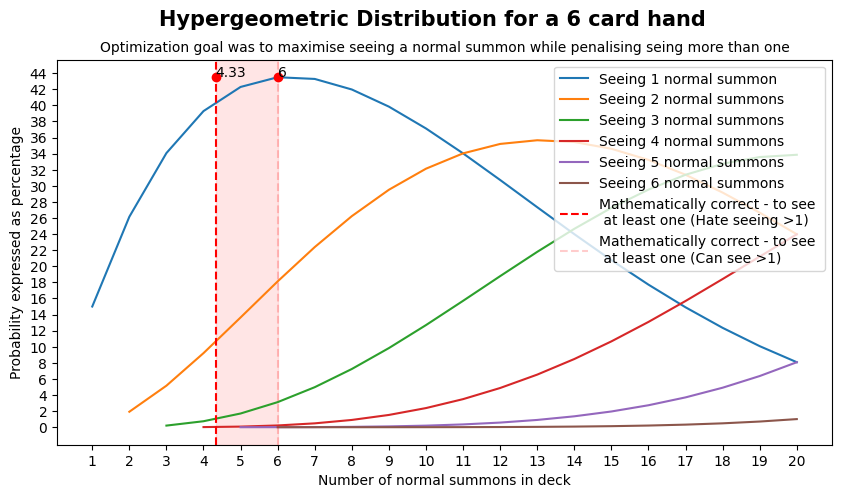

In [100]:
seeing_1 = []
for i in range(1, 21):
    seeing_1.append(hypergeometric_distribution(40, 6, i, 1)*100)

seeing_2 = []
for i in range(2, 21):
    seeing_2.append(hypergeometric_distribution(40, 6, i, 2)*100)

seeing_3 = []
for i in range(3, 21):
    seeing_3.append(hypergeometric_distribution(40, 6, i, 3)*100)

seeing_4 = []
for i in range(4, 21):
    seeing_4.append(hypergeometric_distribution(40, 6, i, 4)*100)

seeing_5 = []
for i in range(5, 21):
    seeing_5.append(hypergeometric_distribution(40, 6, i, 5)*100)

seeing_6 = []
for i in range(6, 21):
    seeing_6.append(hypergeometric_distribution(40, 6, i, 6)*100)

mathematically_correct = (range(1, 21)[seeing_1.index(max(seeing_1))] +
                          range(2, 21)[seeing_2.index(min(seeing_2))] +
                          range(3, 21)[seeing_3.index(min(seeing_3))] +
                          range(4, 21)[seeing_4.index(min(seeing_4))] +
                          range(5, 21)[seeing_5.index(min(seeing_5))] +
                          range(6, 21)[seeing_6.index(min(seeing_6))])/6
mathematically_correct = round(mathematically_correct, 2)

no_optimization = range(1, 21)[seeing_1.index(max(seeing_1))]
no_optimization = round(no_optimization, 2)

# y-axis to be in percentage
plt.plot(range(1, 21), seeing_1)
plt.plot(range(2, 21), seeing_2)
plt.plot(range(3, 21), seeing_3)
plt.plot(range(4, 21), seeing_4)
plt.plot(range(5, 21), seeing_5)
plt.plot(range(6, 21), seeing_6)
plt.axvline(x=mathematically_correct, color='r', linestyle='--')
plt.axvline(x=no_optimization, color='r', linestyle='--', alpha=0.2)
plt.plot(mathematically_correct, max(seeing_1), 'ro')
plt.text(mathematically_correct, max(seeing_1), '{}'.format(mathematically_correct))
plt.plot(no_optimization, max(seeing_1), 'ro')
plt.text(no_optimization, max(seeing_1), '{}'.format(no_optimization))
plt.axvspan(mathematically_correct, no_optimization, alpha=0.1, color='red')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(range(1, 21))
plt.yticks(range(0, 45, 2))
plt.xlabel('Number of normal summons in deck')
plt.ylabel('Probability expressed as percentage')
plt.suptitle('Hypergeometric Distribution for a 6 card hand', fontsize=15, fontweight='bold')
plt.title('Optimization goal was to maximise seeing a normal summon while penalising seing more than one', fontsize=10)
plt.legend(['Seeing 1 normal summon', 'Seeing 2 normal summons', 'Seeing 3 normal summons', 'Seeing 4 normal summons', 'Seeing 5 normal summons', 'Seeing 6 normal summons', 'Mathematically correct - to see \n at least one (Hate seeing >1)', 'Mathematically correct - to see \n at least one (Can see >1)'], loc='upper right')
plt.show()